In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('laptop_price.csv',encoding='latin-1')

In [3]:
df.shape


(1303, 13)

In [ ]:
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [5]:
df = df.drop(['laptop_ID', 'Product'], axis=1)

In [6]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
984,Toshiba,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.75kg,915.0
874,Samsung,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.23kg,1849.0
953,Asus,2 in 1 Convertible,12.5,Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,1159.0
842,HP,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63kg,910.0
90,Asus,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


In [9]:
df['Company'].value_counts()


Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

# One Hot Encoded Company and Typename Column 


In [10]:
counts = df['Company'].value_counts()
threshold = 10
repl = counts[counts <= threshold].index
df['Company'] = df['Company'].replace(repl, 'uncommon')
dummies = pd.get_dummies(df['Company'])
dummies = dummies.astype(int)
df = df.drop('Company', axis=1).join(dummies)

In [11]:
counts1 = df['TypeName'].value_counts()
df = df.join(pd.get_dummies(df.TypeName).astype(int))
df.drop(['TypeName'],axis=1,inplace=True)

In [12]:
df.sample(5)

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
408,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.2kg,409.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1019,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.43kg,2229.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1194,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg,1199.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
607,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.4kg,564.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1098,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,1TB HDD,Intel HD Graphics 405,Windows 10,1.96kg,500.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [13]:
df['ScreenWidth'] = df['ScreenResolution'].str.split('x').apply(lambda x: x[0][-4:]).astype(int)
df['ScreenHeight'] = df['ScreenResolution'].str.split('x').apply(lambda x: x[1]).astype(int)


df.drop(['ScreenResolution'], axis=1, inplace=True)


In [14]:
df.head()

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight
0,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2560,1600
1,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1440,900
2,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080
3,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2880,1800
4,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2560,1600


# Extracted CPU Brand and its frequency 

In [15]:
df['CPU Brand']=df['Cpu'].str.split(" ").apply(lambda x : x[0])
df['CPU Frequency']=df['Cpu'].str.split(" ").apply(lambda x : x[-1])


In [16]:
df.drop(['Cpu'],axis=1,inplace=True)

In [17]:
df.sample(5)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency
1212,17.3,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43kg,1948.99,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1920,1080,Intel,2.6GHz
1238,15.6,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.3kg,1169.00,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1920,1080,Intel,2.6GHz
616,15.6,4GB,128GB SSD,AMD Radeon R5 M420,Linux,2.18kg,569.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.5GHz
39,15.6,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.1kg,879.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080,Intel,1.6GHz
422,15.6,8GB,256GB SSD,Intel HD Graphics 630,Windows 10,2.31kg,1427.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.9GHz


In [18]:
df['CPU Frequency'] = df['CPU Frequency'].str[:-3]

In [19]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)
df.sample(5)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency
1032,17.3,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.7kg,1191.80,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1920,1080,Intel,2.8
353,15.6,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.6kg,1738.27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1920,1080,Intel,2.8
1146,12.5,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,2296.95,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1920,1080,Intel,2.50
21,15.6,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,999.00,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1920,1080,Intel,2.5
254,17.3,4,256GB SSD,Nvidia GeForce MX130,Windows 10,3kg,702.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.7


In [20]:
df['CPU Frequency'] = df['CPU Frequency'].astype(float)
df.sample(5)

,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency
1040,15.6,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,847.00,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1920,1080,Intel,2.5
447,15.6,8,64GB Flash Storage + 1TB HDD,Nvidia Quadro M620,Windows 10,2.23kg,1993.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1920,1080,Intel,3.0
604,15.6,4,1TB HDD,AMD Radeon R5 M420,Linux,2.18kg,465.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1366,768,Intel,2.0
1281,15.6,8,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1366,768,Intel,2.7
554,17.3,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63kg,1280.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.7


In [21]:
df['Memory Amount'] = df.Memory.str.split(" ").apply(lambda x : x[0])
df['Memory Type'] = df.Memory.str.split(" ").apply(lambda x : x[1])
df['Memory Type'].value_counts()



Memory Type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

In [22]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [23]:
df["Memory Amount"] = df["Memory Amount"].apply(turn_memory_into_MB)

In [24]:
df.drop(['Memory'],axis=1,inplace=True)

# Fixing Weight Column

In [25]:
df['Weight'] = df['Weight'].astype(str)
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False)
df['Weight'] = df['Weight'].replace('', np.nan)
df['Weight'] = df['Weight'].astype(float)
df.sample(5)

,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency,Memory Amount,Memory Type
359,14.0,8,Intel HD Graphics 620,Windows 10,1.36,1427.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1920,1080,Intel,2.6,256000.0,SSD
730,17.3,16,Nvidia GeForce GTX 1060,Windows 10,4.20,1935.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1920,1080,Intel,2.6,128000.0,SSD
1020,15.6,4,Intel HD Graphics 520,Windows 10,2.08,795.99,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1920,1080,Intel,2.3,1000000.0,HDD
1198,15.6,4,Intel HD Graphics 500,Linux,2.10,272.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1366,768,Intel,2.0,1000000.0,HDD
1108,15.6,4,AMD Radeon R4,Windows 10,2.10,398.00,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1920,1080,AMD,2.5,1000000.0,HDD


# One Hot Encoding OpSys

In [26]:
df=df.join(pd.get_dummies(df.OpSys).astype(int))
df.drop(['OpSys'],axis=1,inplace=True)

# Fixing GPU Column

In [27]:
df['GPU Brand']=df.Gpu.str.split(" ").apply(lambda x :x[0])
df.drop(['Gpu'],axis=1,inplace=True)

In [28]:
df.sample(5)

,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Brand,CPU Frequency,Memory Amount,Memory Type,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,GPU Brand
974,17.3,16,2.73,2049.9,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1920,1080,Intel,2.8,256000.0,SSD,0,0,0,0,0,1,0,0,0,Nvidia
294,15.6,8,2.05,739.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1920,1080,Intel,1.6,256000.0,SSD,0,0,0,0,0,1,0,0,0,Intel
985,15.6,4,2.25,599.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1366,768,Intel,2.5,500000.0,HDD,0,0,0,0,0,1,0,0,0,AMD
1282,11.6,2,1.17,209.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1366,768,Intel,1.6,32000.0,Flash,0,0,0,0,0,1,0,0,0,Intel
557,17.3,6,2.80,949.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1600,900,Intel,2.7,128000.0,SSD,0,0,0,0,0,1,0,0,0,Nvidia


In [29]:
cpu_categories = pd.get_dummies(df["CPU Brand"]).astype(int)
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [30]:
gpu_categories = pd.get_dummies(df["GPU Brand"]).astype(int)
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)
df.sample(5)


,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Toshiba,uncommon,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,ScreenWidth,ScreenHeight,CPU Frequency,Memory Amount,Memory Type,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
362,17.3,6,2.80,719.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1600,900,2.5,128000.0,SSD,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
452,15.6,8,2.31,1534.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1920,1080,2.9,512000.0,SSD,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1162,15.6,8,2.62,899.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1920,1080,2.8,1000000.0,HDD,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
538,17.3,12,2.62,1799.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1920,1080,2.8,1000000.0,HDD,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
183,15.6,8,2.00,793.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1366,768,2.5,128000.0,SSD,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [31]:
df=df.join(pd.get_dummies(df['Memory Type']).astype(int))

In [32]:
df.drop(['Memory Type'],axis=1,inplace=True)

In [33]:
df.shape


(1303, 43)

# Feature Selection

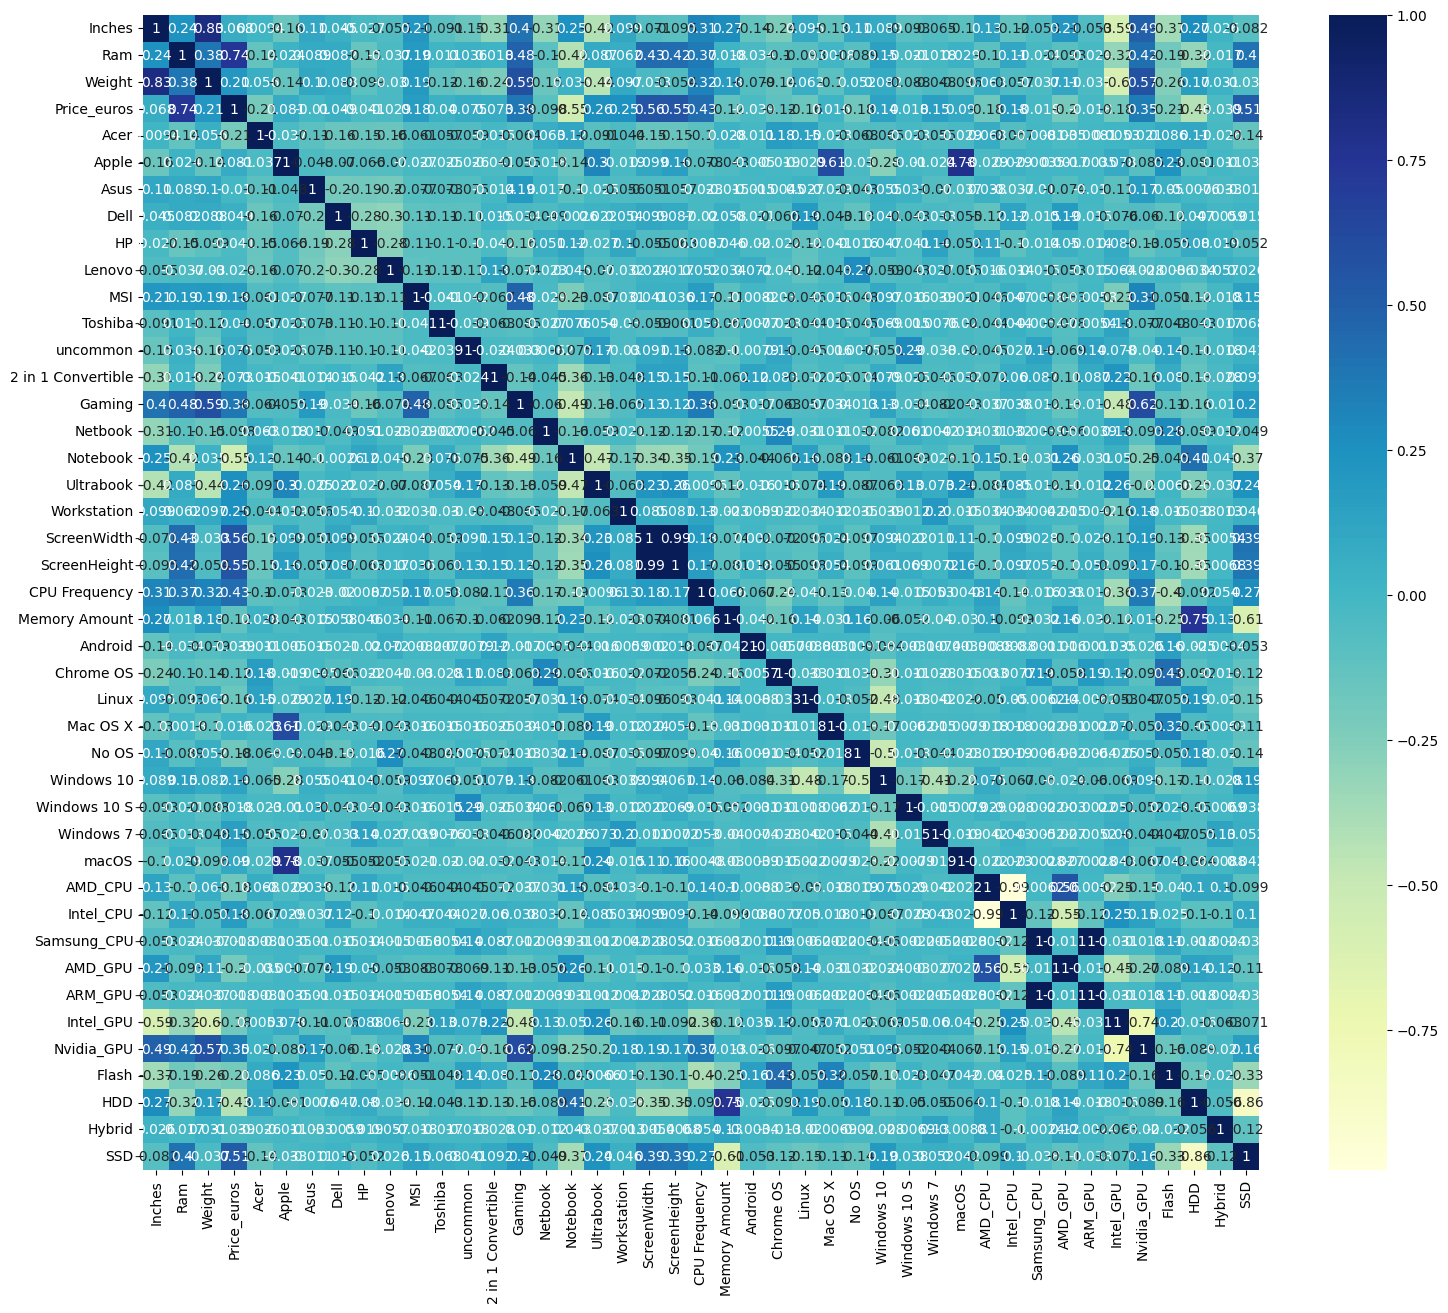

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 15))

# Select numeric columns only for correlation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="YlGnBu")
plt.show()


In [35]:
target_correlations = numeric_df.corr()['Price_euros'].apply(abs).sort_values()

In [36]:
target_correlations

Asus                  0.010376
Mac OS X              0.015656
Windows 10 S          0.018312
Samsung_CPU           0.018431
ARM_GPU               0.018431
Lenovo                0.029007
Android               0.038700
Hybrid                0.039386
Toshiba               0.040339
HP                    0.041291
Dell                  0.048509
Inches                0.068197
2 in 1 Convertible    0.072675
uncommon              0.075249
Apple                 0.080688
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI                   0.180100
AMD_CPU               0.180111
Intel_CPU             0.181127
Intel_GPU             0.184205
AMD_GPU               0.199415
Acer                  0.208349
Weight                0.210370
Flash                 0.210823
Workstation           0.249752
Ultraboo

In [37]:
selected_features = target_correlations[-21:].index

In [38]:
selected_features = list(selected_features)

In [39]:
selected_features

['No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Flash',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'HDD',
 'CPU Frequency',
 'SSD',
 'Notebook',
 'ScreenHeight',
 'ScreenWidth',
 'Ram',
 'Price_euros']

In [40]:
limited_df = df[selected_features]

<Axes: >

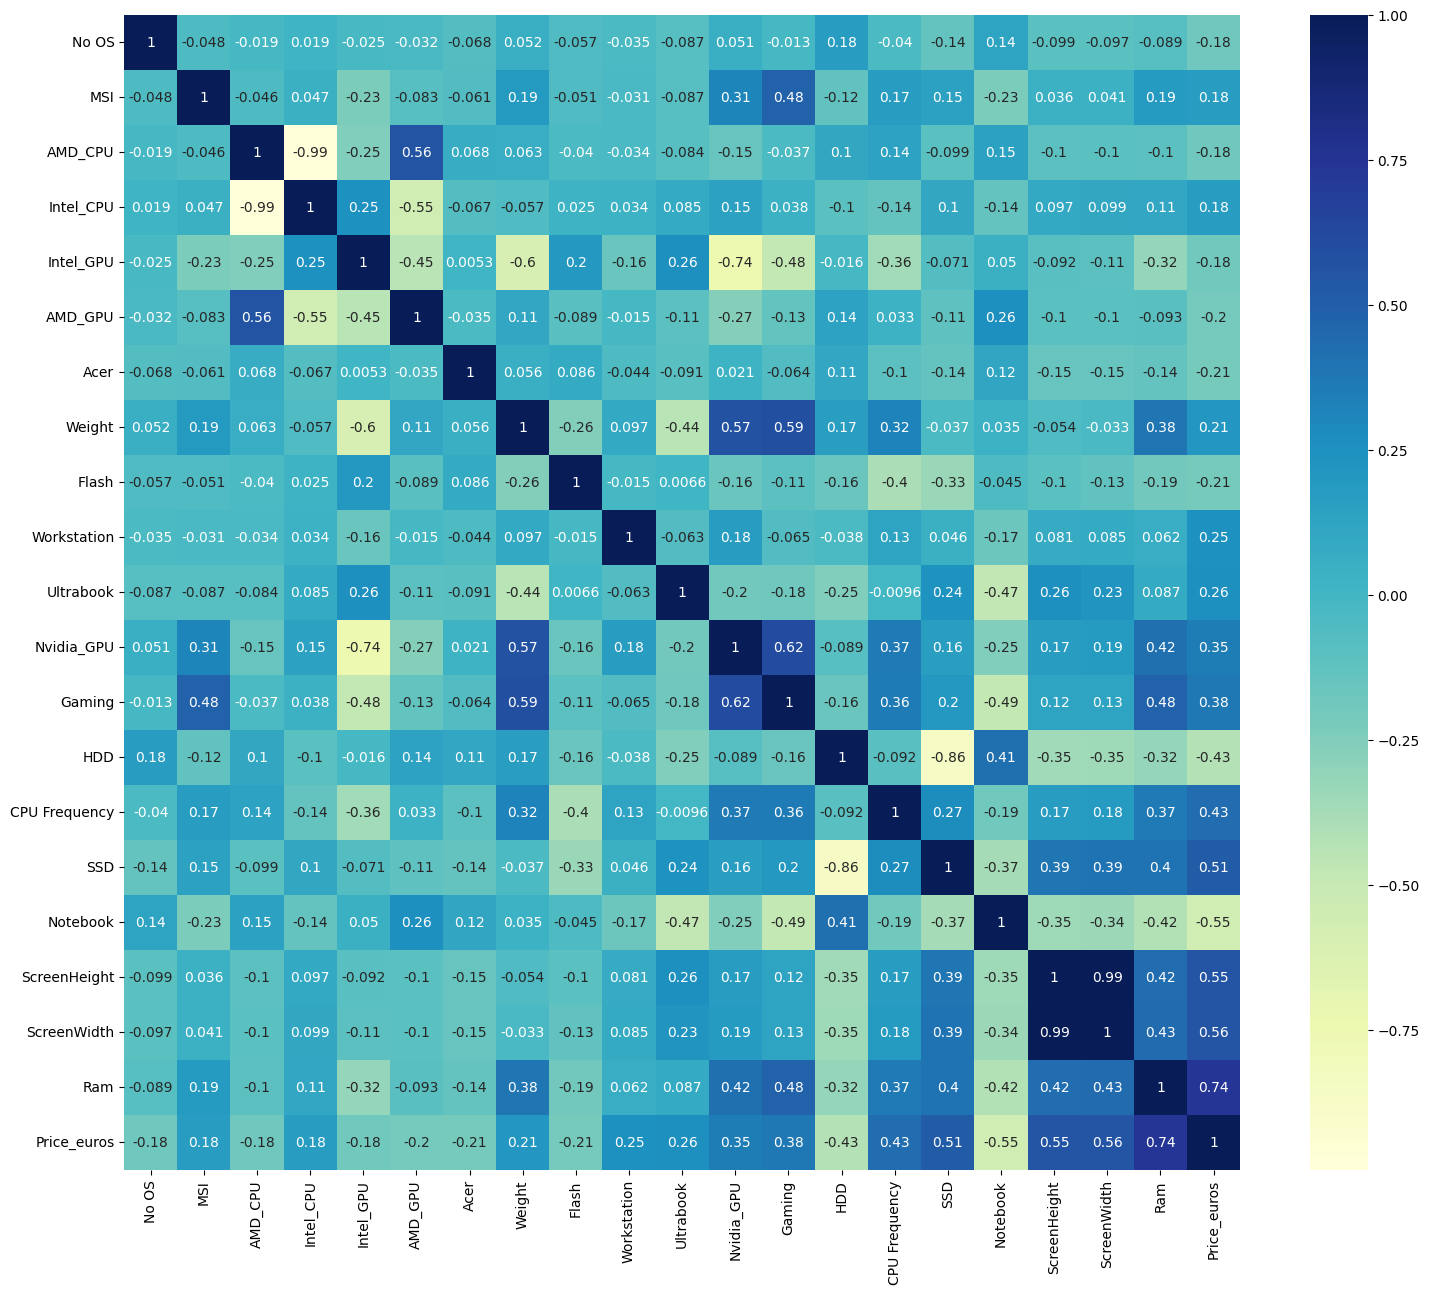

In [41]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

# Model  Training

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [44]:
forest.score(X_test_scaled, y_test)

0.7847379887230045

In [45]:
y_pred = forest.predict(X_test_scaled)

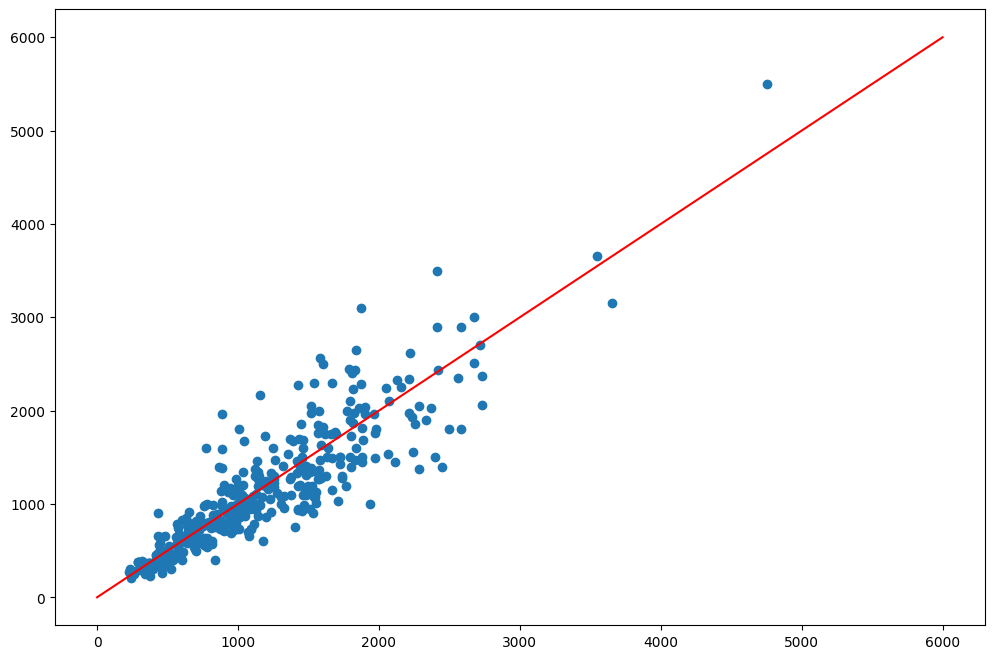

In [46]:
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [47]:
scores = cross_val_score(forest, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.7994197  0.80861898 0.8226837  0.74057408 0.73604197]
Average score: 0.7814676860444537


# Comparing With XGBoost

In [48]:

from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)


xgb_rmse_scores = -cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=rmse_scorer)
xgb_r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

print("🔷 XGBoost CV RMSE Scores:", xgb_rmse_scores)
print("🔷 XGBoost Average CV RMSE:", xgb_rmse_scores.mean())
print("🔷 XGBoost Average CV R²:", xgb_r2_scores.mean())


rf_rmse_scores = -cross_val_score(forest, X_train, y_train, cv=5, scoring=rmse_scorer)
rf_r2_scores = cross_val_score(forest, X_train, y_train, cv=5, scoring='r2')

print("🟢 Random Forest CV RMSE Scores:", rf_rmse_scores)
print("🟢 Random Forest Average CV RMSE:", rf_rmse_scores.mean())
print("🟢 Random Forest Average CV R²:", rf_r2_scores.mean())


🔷 XGBoost CV RMSE Scores: [395.52060672 274.39450872 306.9192002  361.27773844 275.91402776]
🔷 XGBoost Average CV RMSE: 322.8052163655275
🔷 XGBoost Average CV R²: 0.7915220493269249
🟢 Random Forest CV RMSE Scores: [371.55710158 280.56059665 272.84592224 373.52981384 302.06516832]
🟢 Random Forest Average CV RMSE: 320.1117205249912
🟢 Random Forest Average CV R²: 0.793363516656356


# Clearly XGBoost is More Accurate